## Rubrics
* 10% for coming up with an interesting problem based on the dataset
* 10% for exploratory data analysis / visualization to understand the data
* 10% for preparing the dataset to suit your specific problem definition
* 20% for the use of data science / machine learning to solve the problem
* 10% for learning something new and/or doing something beyond the course
* 20% for the presentation of your project, teamwork, and overall impression
* 20% for your individual contribution, evaluated through peer assessment

## Background
Though epilepsy is recognised as a major medical and social problem in Singapore, there is no epidemiological survey to realise the size of the problem. There is a life-time prevalence of 3.8 per 1000.

## From epilepsy.sg
* 10% of people with epilepsy expressed strained family relationships, citing em-barrassment, financial strain and being a burden to spouse and family members as chief reasons.

* 20% also admitted to difficulty making friends or maintaining a relationship at work or in social gatherings. Low self-esteem, fear of avoidance and embarrassment were among the common reasons.

* Almost 42% also chose not to divulge their medical condition to their friends. 49 - 53% of responders cite resentment, depression and anxiety as their main psychological barriers. About

* 70% of people with epilepsy indicated that they would want to marry and have children. While 86% of community respondents (non-people with epilepsy) agreed that people with epilepsy should marry, only about 36% would allow their children to marry one.

* Up to 38% of employers would hire an epilepsy sufferer though 66% would do so if seizures did not interfere with the epilepsy sufferer’s job. Almost half of the people with epilepsy polled keep their medical condition from their employers. As part of their employee medical benefits, employers in general do provide varying amounts of subsidy for employee health care visits.

# Problem
To identify if a person is having a seizure or not based on a sample of his EEG readings (binary classification)

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
url = 'https://raw.githubusercontent.com/cheejiayuan512/data/master/epilepsy.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Description of dataset: This EEG dataset includes 4097 electroencephalograms (EEG) readings per patient over 23.5 seconds, with 500 patients in total  from one point. The 4097 data points were then divided equally into 23 chunks per patient; each chunk is translated into one row in the dataset. Each row contains 178 readings that are turned into columns; in other words, there are 178 columns that make up one second of EEG readings. There are 11,500 rows and 180 columns with the first being patient ID and the last column containing the status of the patient, whether the patient is having a seizure or not.

In [2]:
data['Seizure Status'] = ""

for i in range(11500):
    if data.iloc[i ,179] == 1:
        data.iloc[i, 180] = 1
    else:
        data.iloc[i, 180] = 0
        
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Seizure Status
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


## Univariate Exploratory Analysis & Decision Tree Classifier

In [3]:
y = pd.DataFrame(data["Seizure Status"])
x = pd.DataFrame(data[["X1"]])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0, test_size = 0.25)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (8625, 1) (8625, 1)
Test Set  : (2875, 1) (2875, 1)


In [5]:
y_train["Seizure Status"].value_counts()

0    6888
1    1737
Name: Seizure Status, dtype: int64

In [6]:
x_train.describe()

,X1
count,8625.000000
mean,-11.793159
std,169.216176
min,-1839.000000
25%,-54.000000
50%,-7.000000
75%,35.000000
max,1726.000000


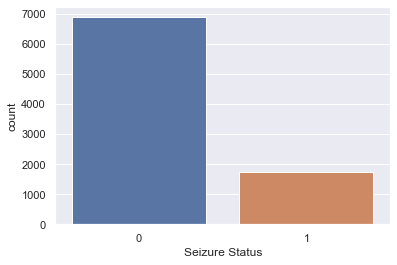

In [7]:
sb.countplot(y_train["Seizure Status"])

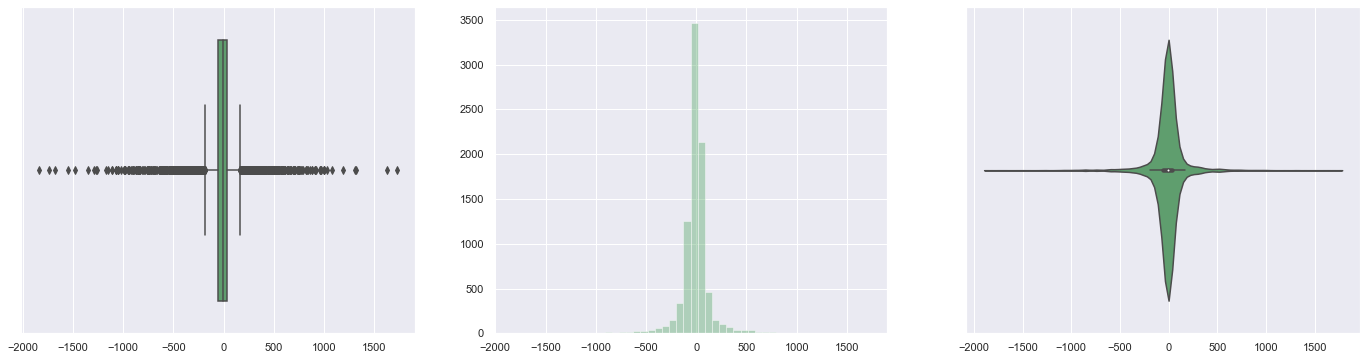

In [8]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(x_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(x_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(x_train, ax = axes[2], color = "g")

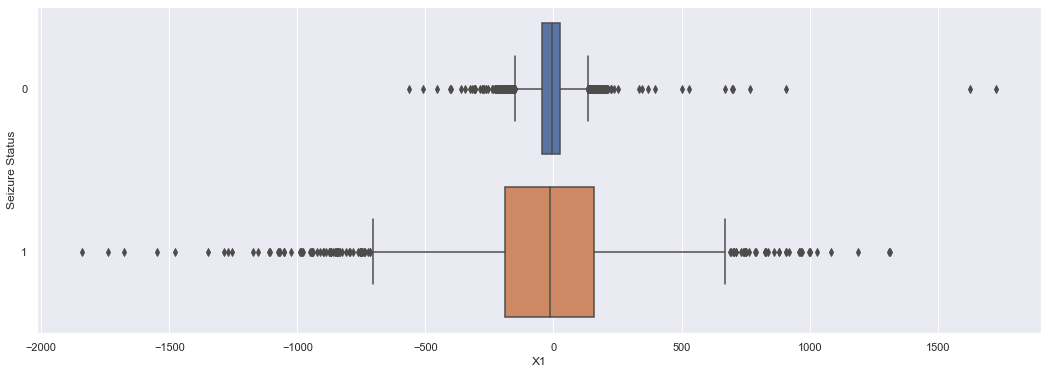

In [9]:
jointDF = pd.concat([x_train, y_train.reindex(index=x_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "X1", y = "Seizure Status", data = jointDF, orient = "h")

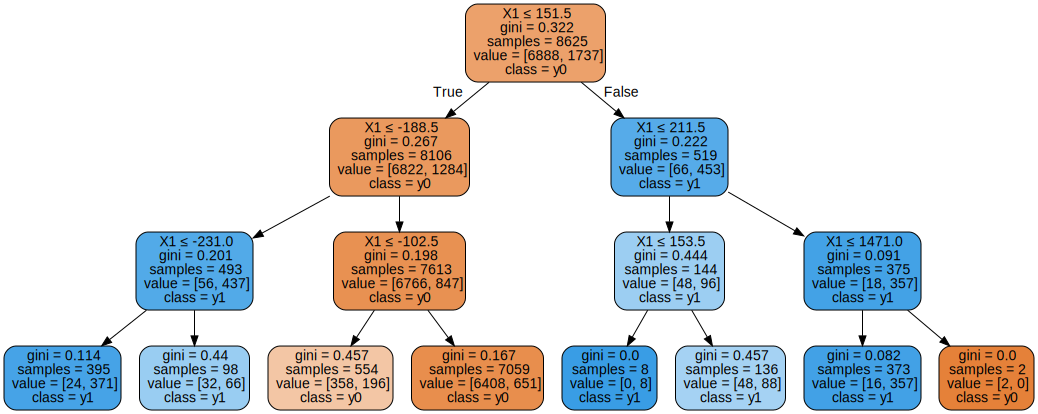

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
dectreex1 = DecisionTreeClassifier(max_depth = 3)
dectreex1.fit(x_train, y_train)

treedot = export_graphviz(dectreex1, feature_names = x_train.columns, class_names = True, out_file = None, filled = True, rounded = True, special_characters = True)      
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8878840579710144

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8942608695652174



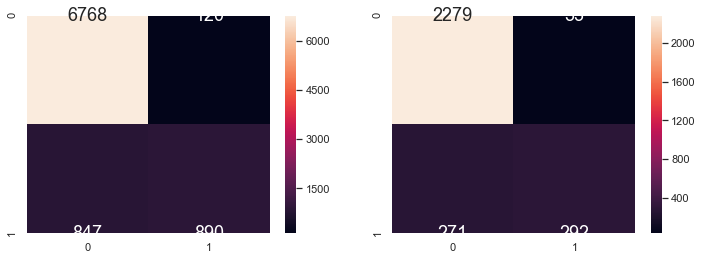

In [11]:
from sklearn.metrics import confusion_matrix

y_train_pred = dectreex1.predict(x_train)
y_test_pred = dectreex1.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Multivariate Exploratory Analysis & Decision Tree Classifier

In [12]:
ym = pd.DataFrame(data['Seizure Status'])
xm = pd.DataFrame(data.iloc[:,1:179])
xm.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [13]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size = 0.25)

In [14]:
ym_train["Seizure Status"].value_counts()

0    6899
1    1726
Name: Seizure Status, dtype: int64

In [15]:
xm_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,...,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000
mean,-12.154087,-11.004290,-9.892522,-8.677449,-7.532174,-6.685101,-6.625855,-7.181797,-7.440696,-7.059942,...,-8.867594,-9.688116,-11.356290,-12.546319,-13.004058,-12.592232,-12.105275,-11.573101,-11.021101,-10.483130
std,165.770427,166.023745,163.630074,161.128649,160.655546,160.779302,161.050689,162.372539,162.746602,158.916164,...,167.729459,167.496492,168.497673,170.515702,170.362560,169.765055,167.074067,164.549214,162.736873,163.518753
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1615.000000,-1840.000000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1664.000000,-1642.000000,-1781.000000,-1727.000000,-1829.000000
25%,-55.000000,-55.000000,-55.000000,-55.000000,-55.000000,-54.000000,-55.000000,-55.000000,-55.000000,-55.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-55.000000,-54.000000,-54.000000,-55.000000
50%,-8.000000,-8.000000,-8.000000,-8.000000,-9.000000,-8.000000,-8.000000,-8.000000,-8.000000,-7.000000,...,-8.000000,-8.000000,-8.000000,-9.000000,-9.000000,-9.000000,-8.000000,-8.000000,-9.000000,-8.000000
75%,34.000000,35.000000,36.000000,36.000000,36.000000,36.000000,36.000000,37.000000,37.000000,36.000000,...,37.000000,35.000000,35.000000,34.000000,35.000000,35.000000,34.000000,35.000000,35.000000,34.000000
max,1314.000000,1356.000000,1274.000000,1226.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


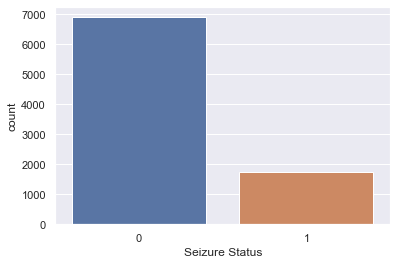

In [16]:
sb.countplot(ym_train["Seizure Status"])

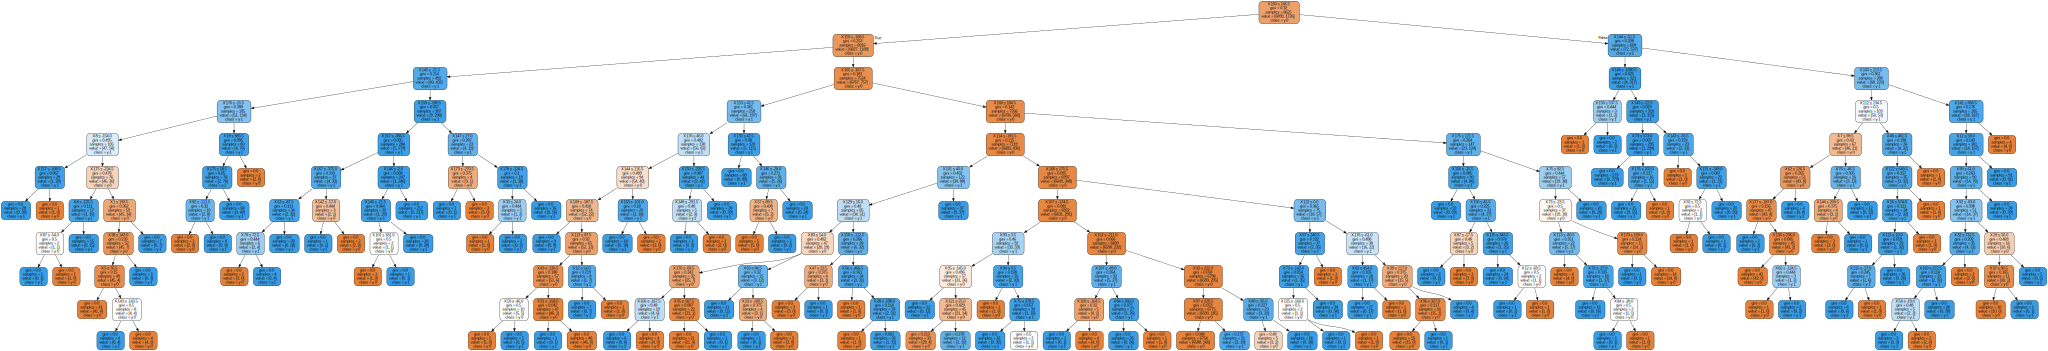

In [17]:
dectreexm = DecisionTreeClassifier(max_depth = 10, random_state =0)  
dectreexm.fit(xm_train, ym_train)    

ym_train_pred = dectreexm.predict(xm_train)
ym_test_pred = dectreexm.predict(xm_test)

treedot = export_graphviz(dectreexm, feature_names = xm_train.columns, class_names = True, out_file = None, filled = True, rounded = True, special_characters = True)   


graphviz.Source(treedot)

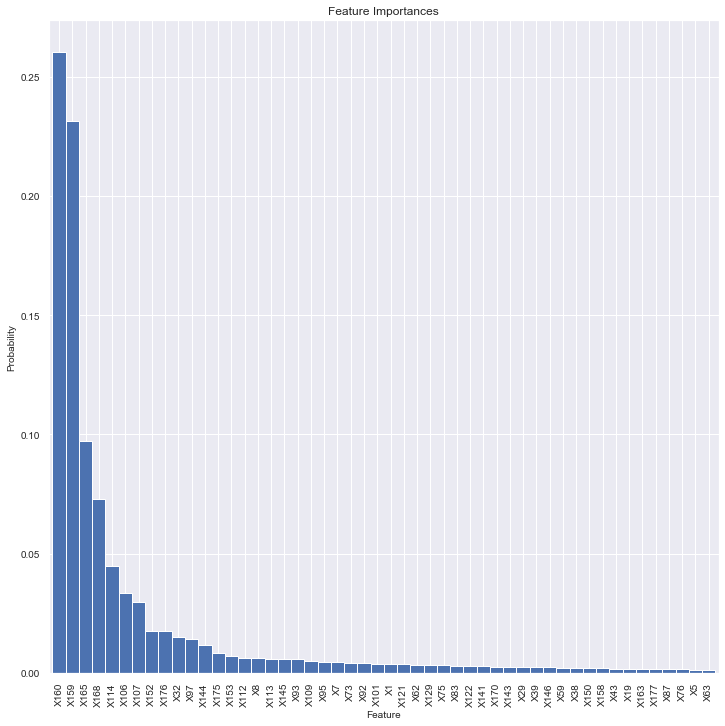

In [18]:
column_list = data.columns.tolist()
columni = column_list[1:179]
feature_importances = pd.DataFrame(dectreexm.feature_importances_, index = columni, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_graph = feature_importances.iloc[:50]
ax = feature_importances_graph[['importance']].plot(kind='bar', title ="Feature Importances", figsize=(12, 12), legend=False, fontsize=10, width = 1)
ax.set_xlabel("Feature", fontsize=10)
ax.set_ylabel("Probability", fontsize=10)
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9793623188405797

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9314782608695652



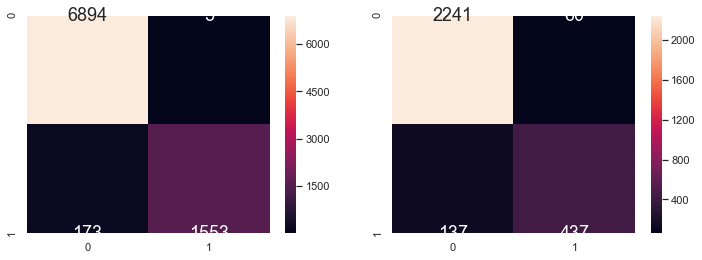

In [19]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreexm.score(xm_train, ym_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreexm.score(xm_test, ym_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ym_train, ym_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ym_test, ym_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [20]:
from sklearn.metrics import f1_score
print("F1 Score of Train Data \t:", f1_score(ym_train, ym_train_pred))
print("F1 Score of Test Data \t:", f1_score(ym_test, ym_test_pred))

F1 Score of Train Data 	: 0.9457978075517661
F1 Score of Test Data 	: 0.8160597572362278


In [21]:
data_pred = data[data.iloc[:,0].isin(["X21.V1.791", "X15.V1.924", "X8.V1.1"])]
data_pred

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Seizure Status
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0


In [22]:
xm_pred = pd.DataFrame(data_pred.iloc[:,1:179])
ym_pred = dectreexm.predict(xm_pred)

In [23]:
ym_pred = pd.DataFrame(ym_pred, columns = ["Predict Seizure Status"], index = data_pred.index)
ym_combined = pd.concat([data_pred.iloc[:,0], data_pred[["Seizure Status"]], ym_pred], axis = 1)

ym_combined

,Unnamed: 0,Seizure Status,Predict Seizure Status
0,X21.V1.791,0,0
1,X15.V1.924,1,1
2,X8.V1.1,0,0


## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(xm_train, ym_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

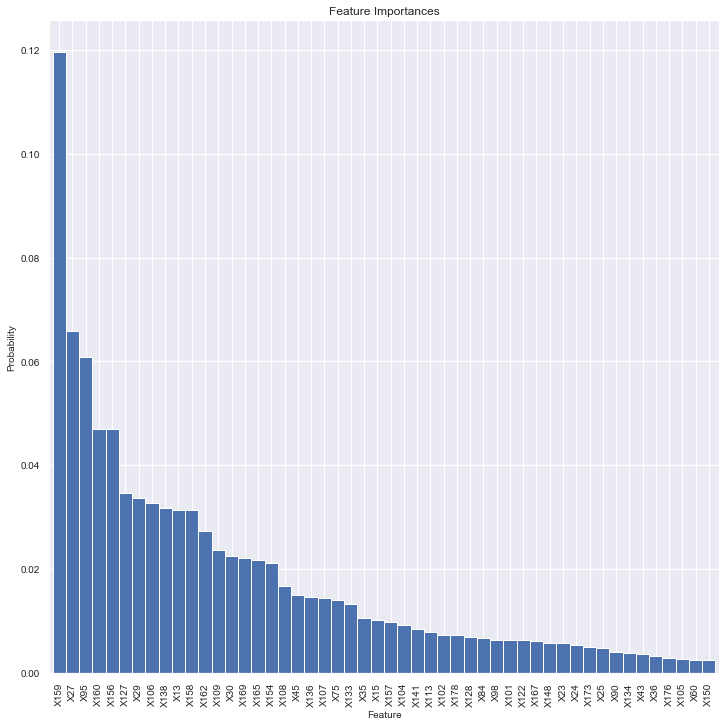

In [25]:
column_list = data.columns.tolist()
columni = column_list[1:179]
feature_importances = pd.DataFrame(clf.feature_importances_, index = columni, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_graph = feature_importances.iloc[:50]
ax = feature_importances_graph[['importance']].plot(kind='bar', title ="Feature Importances", figsize=(12, 12), legend=False, fontsize=10, width = 1)
ax.set_xlabel("Feature", fontsize=10)
ax.set_ylabel("Probability", fontsize=10)
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9596521739130435

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9443478260869566



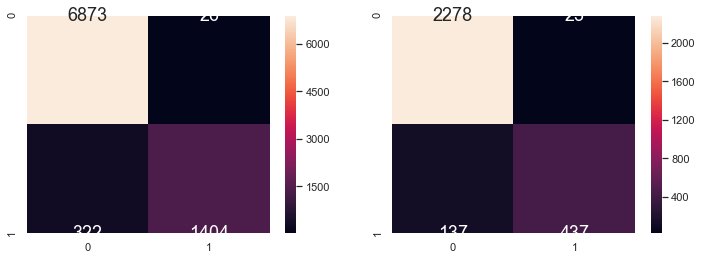

In [26]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(xm_train, ym_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(xm_test, ym_test))
print()

rfym_train_pred = clf.predict(xm_train)
rfym_test_pred = clf.predict(xm_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ym_train, rfym_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ym_test, rfym_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [27]:
print("F1 Score of Train Data \t:", f1_score(ym_train, rfym_train_pred))
print("F1 Score of Test Data \t:", f1_score(ym_test, rfym_test_pred))

F1 Score of Train Data 	: 0.8897338403041825
F1 Score of Test Data 	: 0.8452611218568664


In [28]:
data_pred = data[data.iloc[:,0].isin(["X21.V1.791", "X15.V1.924", "X8.V1.1"])]
rfxm_pred = pd.DataFrame(data_pred.iloc[:,1:179])
rfym_pred = clf.predict(rfxm_pred)
rfym_pred = pd.DataFrame(rfym_pred, columns = ["Predict Seizure Status"], index = data_pred.index)
rfym_combined = pd.concat([data_pred.iloc[:,0], data_pred[["Seizure Status"]], rfym_pred], axis = 1)

rfym_combined

,Unnamed: 0,Seizure Status,Predict Seizure Status
0,X21.V1.791,0,0
1,X15.V1.924,1,1
2,X8.V1.1,0,0


## Drawing of Decision Trees within Random Forest

In [29]:
import pydotplus
import six
import os
from sklearn import tree
from sklearn.tree import export_graphviz
from subprocess import call
dotfile = six.StringIO()
count = 0 
os.chdir('___DIRECTORY OF FILE___')
for estimator in clf.estimators_:

    export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = xm_train.columns,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

    os.system('dot -Tpng tree.dot -o tree.png')
    name = 'tree' + str(count) + '.png'
    os.rename('tree.png', name) 
    count+= 1

## Extra Trees Classifier

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=0)
etc.fit(xm_train, ym_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

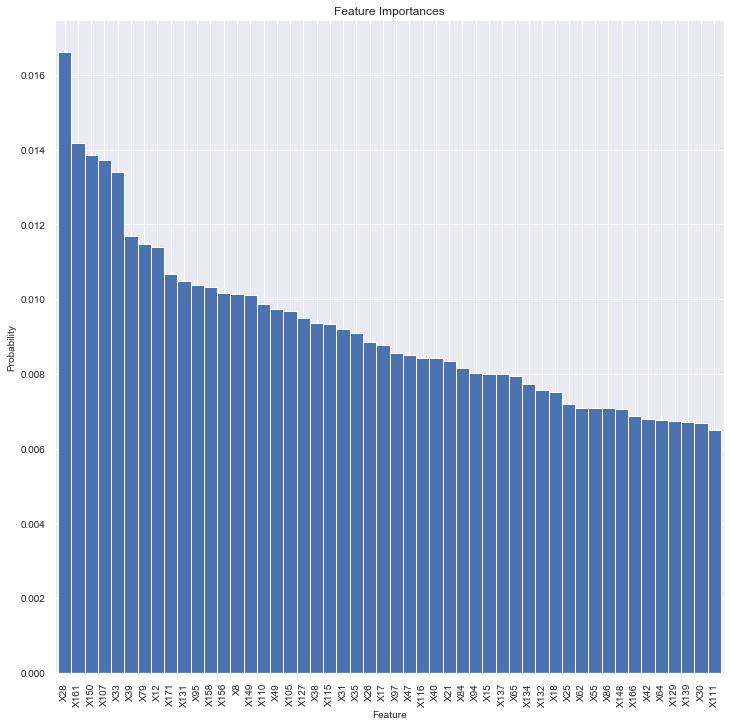

In [31]:
column_list = data.columns.tolist()
columni = column_list[1:179]
feature_importances = pd.DataFrame(etc.feature_importances_, index = columni, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_graph = feature_importances.iloc[:50]
ax = feature_importances_graph[['importance']].plot(kind='bar', title ="Feature Importances", figsize=(12, 12), legend=False, fontsize=10, width = 1)
ax.set_xlabel("Feature", fontsize=10)
ax.set_ylabel("Probability", fontsize=10)
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9690434782608696



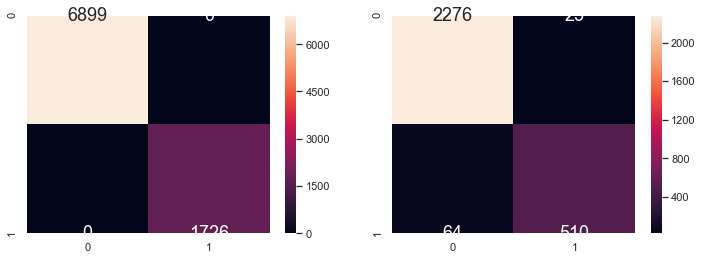

In [32]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(xm_train, ym_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(xm_test, ym_test))
print()

etc_train_pred = etc.predict(xm_train)
etc_test_pred = etc.predict(xm_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ym_train, etc_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ym_test, etc_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [33]:
print("F1 Score of Train Data \t:", f1_score(ym_train, etc_train_pred))
print("F1 Score of Test Data \t:", f1_score(ym_test, etc_test_pred))

F1 Score of Train Data 	: 1.0
F1 Score of Test Data 	: 0.9197475202885483


In [34]:
data_predt = data[data.iloc[:,0].isin(["X21.V1.791", "X15.V1.924", "X8.V1.1"])]
xm_predt = pd.DataFrame(data_predt.iloc[:,1:179])
ym_predt = etc.predict(xm_predt)
ym_predt = pd.DataFrame(ym_predt, columns = ["Predict Seizure Status"], index = data_predt.index)
ym_combinedt = pd.concat([data_predt.iloc[:,0], data_predt[["Seizure Status"]], ym_predt], axis = 1)

ym_combinedt

,Unnamed: 0,Seizure Status,Predict Seizure Status
0,X21.V1.791,0,0
1,X15.V1.924,1,1
2,X8.V1.1,0,0


## Keras Neural Network

In [35]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(178,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xm_train, ym_train, epochs=100, batch_size=128)

Train on 8625 samples
Epoch 1/100
8625/8625 [==============================] - 1s 106us/sample - loss: 56.9178 - accuracy: 0.7275
Epoch 2/100
8625/8625 [==============================] - 0s 15us/sample - loss: 18.4090 - accuracy: 0.6335
Epoch 3/100
8625/8625 [==============================] - 0s 22us/sample - loss: 11.4601 - accuracy: 0.6311
Epoch 4/100
8625/8625 [==============================] - 0s 16us/sample - loss: 8.4807 - accuracy: 0.6537
Epoch 5/100
8625/8625 [==============================] - 0s 25us/sample - loss: 5.8773 - accuracy: 0.6756
Epoch 6/100
8625/8625 [==============================] - 0s 29us/sample - loss: 4.8250 - accuracy: 0.6908
Epoch 7/100
8625/8625 [==============================] - 0s 15us/sample - loss: 4.1442 - accuracy: 0.6999
Epoch 8/100
8625/8625 [==============================] - 0s 37us/sample - loss: 3.1165 - accuracy: 0.7047
Epoch 9/100
8625/8625 [==============================] - 0s 15us/sample - loss: 2.6197 - accuracy: 0.7181
Epoch 10/100
8625/86

8625/8625 [==============================] - 0s 29us/sample - loss: 0.2238 - accuracy: 0.9323
Epoch 78/100
8625/8625 [==============================] - 0s 15us/sample - loss: 0.2313 - accuracy: 0.9328
Epoch 79/100
8625/8625 [==============================] - 0s 25us/sample - loss: 0.2304 - accuracy: 0.9309
Epoch 80/100
8625/8625 [==============================] - 0s 16us/sample - loss: 0.2201 - accuracy: 0.9326
Epoch 81/100
8625/8625 [==============================] - 0s 39us/sample - loss: 0.2187 - accuracy: 0.9359
Epoch 82/100
8625/8625 [==============================] - 0s 22us/sample - loss: 0.2205 - accuracy: 0.9296
Epoch 83/100
8625/8625 [==============================] - 0s 34us/sample - loss: 0.2082 - accuracy: 0.9358
Epoch 84/100
8625/8625 [==============================] - 0s 31us/sample - loss: 0.2142 - accuracy: 0.9338
Epoch 85/100
8625/8625 [==============================] - 0s 31us/sample - loss: 0.2048 - accuracy: 0.9365
Epoch 86/100
8625/8625 [==========================

8625/8625 [==============================] - 0s 30us/sample - loss: 0.1153 - accuracy: 0.9615
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.96150726

2875/2875 [==============================] - 0s 34us/sample - loss: 0.1501 - accuracy: 0.9496
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.94956523



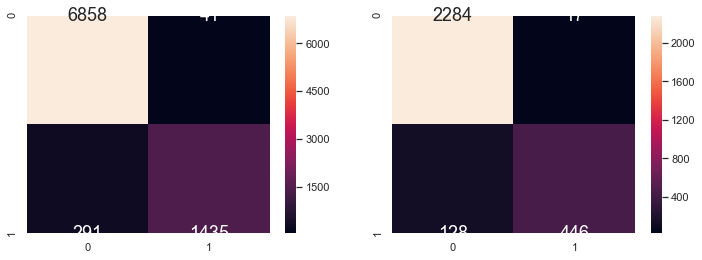

In [36]:
train_loss, train_acc = model.evaluate(xm_train, ym_train)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", train_acc)
print()

test_loss, test_acc = model.evaluate(xm_test, ym_test)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", test_acc)
print()

keras_train_pred = model.predict(xm_train)
keras_test_pred = model.predict(xm_test)
keras_train_pred = np.where(keras_train_pred > 0.5, 1, 0)
keras_test_pred = np.where(keras_test_pred > 0.5, 1, 0)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ym_train, keras_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ym_test, keras_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [37]:
print("F1 Score of Train Data \t:", f1_score(ym_train, keras_train_pred))
print("F1 Score of Test Data \t:", f1_score(ym_test, keras_test_pred))

F1 Score of Train Data 	: 0.89631480324797
F1 Score of Test Data 	: 0.8601735776277724


In [38]:
data_predt = data[data.iloc[:,0].isin(["X21.V1.791", "X15.V1.924", "X8.V1.1"])]
xkeras_predt = pd.DataFrame(data_predt.iloc[:,1:179])
ykeras_predt = model.predict(xkeras_predt)
ykeras_predt = pd.DataFrame(ykeras_predt, columns = ["Predict Seizure Status"], index = data_predt.index)
ykeras_predt.loc[ykeras_predt["Predict Seizure Status"] < 0.5, "Predict Seizure Status"] = int(0)
ykeras_predt.loc[ykeras_predt["Predict Seizure Status"] >= 0.5, "Predict Seizure Status"] = int(1)
ykeras_predt = ykeras_predt.astype(int)
ym_combinedt = pd.concat([data_predt.iloc[:,0], data_predt[["Seizure Status"]], ykeras_predt], axis = 1)
ym_combinedt

,Unnamed: 0,Seizure Status,Predict Seizure Status
0,X21.V1.791,0,0
1,X15.V1.924,1,1
2,X8.V1.1,0,0


## References
* https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
* https://pathmind.com/wiki/neural-network
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
* https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219

